# メモ
IPython を起動するとき -pylab をつけるといろいろ自動で import してくれるようだ.
ただどのライブラリを使っているかわからなくなるのであまりやらない方がいい.

# イントロ

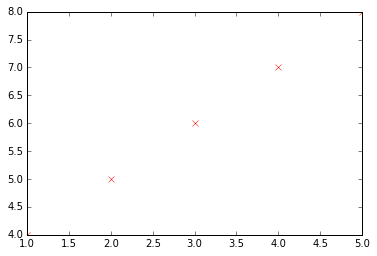

In [4]:
%matplotlib inline
from pylab import *

x = array([1,2,3,4,5])
y = x+3
plot(x,y,'rx')
show()

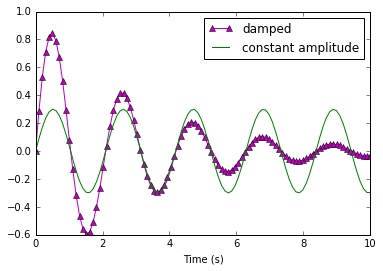

In [3]:
%matplotlib inline

# 0-10 で 100 等分
time = linspace(0.0, 10.0, 100)

# これで配列が作れてしまう
# numpy
height = exp(- time / 3.0) * sin(time * 3)
figure()

plot(time, height, 'm-^')
plot(time, 0.3*sin(time*3), 'g-')

# 凡例, loc は表示場所指定
legend(['damped', 'constant amplitude'], loc='upper right')

xlabel('Time (s)')
show()

In [9]:
A = matrix([ [-13,2,4], [2,-11,6], [4,6,-15] ])
B = array([5,-10,5])
linalg.solve(A,B)

array([-0.28624535,  0.81040892, -0.08550186])

## 三角関数のグラフをまとめて書いてみる

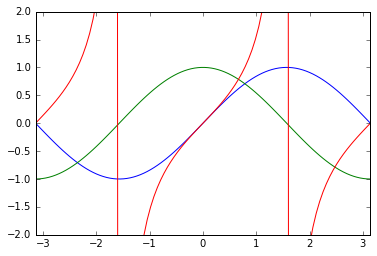

In [12]:
from pylab import *
def plottrig(f):
    xvalues = linspace(-pi, pi, 100)
    plot(xvalues, f(xvalues))
    xlim(-pi, pi)
    ylim(-2, 2)
   
trigfunctions = (sin, cos, tan)

for function in trigfunctions:
    plottrig(function)

show()

# 投射に関する数値計算

## 二分法 (bisection method)

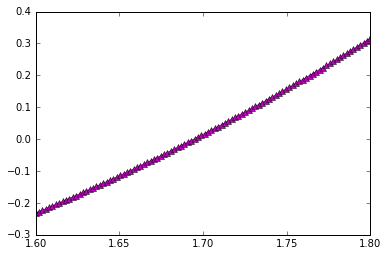

In [56]:
%matplotlib inline
from pylab import *

# 0-10 で 100 等分
time = linspace(1.6, 1.8, 100)

# これで配列が作れてしまう
height = exp(time) * log(time) - time**2
figure()

plot(time, height, 'm-^')

In [22]:
from math import *
tolerance = 1.0e-6

def f(x):
    f = exp(x) * log(x) - x**2
    return f

lst = input('半角カンマで区切った 2 数を入力: ').split(",")
a, b = map(float, lst)

dx = abs(b - a)

while dx > tolerance:
    x = (a + b) / 2.0
    if (f(a) * f(x)) < 0:
        b = x
    else:
        a = x
        
    dx = abs(b-a)
    
print('f(x) = 0 at x = {:.8} +/- {:.8}'.format(x, tolerance))
print(f(x))
print(f(x + tolerance))
print(f(x - tolerance))

半角カンマで区切った 2 数を入力: 1,2
f(x) = 0 at x = 1.6946001 +/- 1e-06
-2.1972592820773684e-06
4.980442214197467e-07
-4.892557384117424e-06


## 一般的な二分法関数を作ってみた

In [58]:
def root_bisection(f, a, b, tolerance = 1.0e-6):
    dx = abs(b-a)
    while dx > tolerance:
        x = (a + b) / 2.0
        if (f(a) + f(x)) < 0:
            b = x
        else:
            a = x
        dx = abs(b - a)
    
    return x

# ちょっとした確認
theta0 = root_bisection(cos, 0, pi)
print(theta0)
print(cos(theta0))

1.5707970758089531
-7.49014056495e-07


## Newton 法

In [ ]:
def root_newton(f, df, guess, tolerance = 1.0e-6):
    dx = 2 * tolerance
    while dx > tolerance:
        x1 = x - f(x) / df(x)
        dx = abs(x - x1)
        x  =x1

    return x

## ライブラリ

scipy に bisect(), newton() などのメソッドがある。

In [3]:
import numpy as np
#import scipy as sp
from scipy.optimize import brentq

# sin x = 0 となる 2 と 4 の間の数を求める
x = brentq(np.sin, 2, 4)
print(x, x - np.pi)

3.141592653589793 0.0


# 数値積分

## 単純な方法: $n$ 等分での区分求積法

In [5]:
import numpy as np

def int_simple(fn, a, b, N):    
    I = 0 # 積分の値
    dx = (b - a) / float(N) # ステップサイズ
    # numpy のメソッドで高速化できないだろうか？
    for j in np.arange(N):
        x = a + dx * j
        I = I + fn(x) * dx

    return I

# 簡単なテスト
print(int_simple(np.sin, 0, np.pi, 100)) # 厳密な値は 2

1.99983550389


## 関数とその値を逐一取るのではなく関数値のリストを渡す

In [3]:
import numpy as np

def int_simple1(f, dx):
    return dx * sum(f)

# 分割数
N = 100
a = 0.0
b = np.pi
dx = (b - a) / float(N)

# リスト内包表記
x = np.arange(a, b, dx)
function_values = np.sin(x)
simple_integral = int_simple1(function_values, dx)
print(simple_integral) # 厳密な値は 2

1.99983550389


## 台形法 (trapezoid method)

In [4]:
import numpy as np

def int_trapezoid(f, dx):
    # 最初と最後は 1/2 だけ足したいので全部足した後に 1/2 引く
    
    return dx * (f.sum - (f[0] + f[f.size]) / 2)

# 分割数
N = 100
a = 0.0
b = np.pi
dx = (b - a) / float(N)

# リスト内包表記
x = np.arange(a, b, dx)
function_values = np.sin(x)
simple_integral = int_simple1(function_values, dx)
print(simple_integral) # 厳密な値は 2

1.99983550389


## シンプソン法 (Simpson's method)

In [ ]:
def int_simpson(f, dx):
    # 点の数
    N = len(f)
    # 積分の初期値
    integral = 0.0
    
    for i in range(1, N-1, 2):
        integral = integral+ f[i-1] + 4.0 * f[i] + f[i+1]
    
    # 刻み幅をかけて 3 で割る
    integral = integral * dx / 3.0
    
    # 点の数が偶数なら最後の点を別途足す
    if (N % 2) == 0:
        integral = integral + dx * (5.0 * f[-1] + 8.0 * f[-2] - f[-3]) / 12.0
        
    return integral

# 数値微分

普通に計算するよりテイラー展開を使った計算から次のようにやった方が刻みの 2 次のオーダーにできる。
\begin{align}
 f_i^{'}
 =
 \frac{f_{i+1} - f_{i-1}}{\Delta x}.
\end{align}
$i \pm 2$ 番目を使えば $(\Delta x)^4$ のオーダーで計算できる。

scipy にも微分計算用のメソッドがある: `scipy.misc.derivative()`。
これは関数の値の列ではなく関数自体を与える必要がある。

In [9]:
#from scipy.misc import derivative
#from scipy import misc
import numpy as np
import scipy as sp

# dx は刻み幅, order は何点使うか (テイラー展開の何次までを使うかにあたる部分)
a = sp.misc.derivative(np.sin, np.pi, dx = 0.1, order=5)
print(a)

-0.999996670633


# Numpy

## 行列

In [22]:
import numpy as np

# 行列を定義
a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])

print("普通に行列を表示")
print(a)

print("スカラー倍")
print (3 * a)

print("行列の和")
print(a + b)

print("行列の積")
print(a * b)

普通に行列を表示
[[1 2]
 [3 4]]
スカラー倍
[[ 3  6]
 [ 9 12]]
行列の和
[[ 6  8]
 [10 12]]
行列の積
[[ 5 12]
 [21 32]]


## 行列の雑多な操作
Numpy は Fortran で書かれた線型代数パッケージ LINPACK を使っていて恐ろしく速い。

In [23]:
print("転置")
print(np.transpose(a))

print("逆行列")
print(np.linalg.inv(a))

print("行列式")
print(np.linalg.det(a))

print("固有値")
print(np.linalg.eig(a))

転置
[[1 3]
 [2 4]]
逆行列
[[-2.   1. ]
 [ 1.5 -0.5]]
行列式
-2.0
固有値
(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))


## 全ての要素に対する処理
高速なので意識して使うこと。

In [3]:
import numpy as np
# 書き方に注意: 引数にはリストを渡す
x = np.array([0, np.pi / 6, np.pi / 5, np.pi / 4, np.pi / 3, np.pi / 2])
print(np.sin(x))

[ 0.          0.5         0.58778525  0.70710678  0.8660254   1.        ]


## 連立一次方程式を解く
\begin{align}
 w + 3x - 5y + 2z &= 0, \\
 4x - 2y +z       &= 6, \\
 2w - x + 3y -z   &= 5, \\
 w + x + y + z    &= 10.
\end{align}

In [7]:
import numpy as np
# 係数行列
A = np.array([[1, 3, -5, 2],
          [0, 4, -2, 1],
          [2, -1, 3, -1],
          [1, 1, 1, 1]])
# 定数項
b = np.array([0, 6, 5, 10])

# 解
x = np.linalg.solve(A, b)
print(x)

[ 1.  2.  3.  4.]


## 特別なメソッド
役に立つからよく出てくる。

In [17]:
import numpy as np

# Array Range
# Python 本体の range と違って整数幅でなくてもいい
a = np.arange(0, 1, 0.25)
print(a)

# Linearly spaced array
# 最後の引数は分割の個数
b = np.linspace(0, 1, 5)
print(b)

# Logrithmic scaled array
# 0.1 ** 10 から 1 ** 10 まで最大で 50 刻む。num を指定すると 50 までの刻み数が変わる
c = np.logspace(0.1, 1, 10)
print(c)

# 適当なサイズの零行列を作る
d = np.zeros([3,4], int)
e = np.zeros([4,5], float)
print(d)
print(e)

# 適当なサイズの 1 で埋まった行列を作る
f = np.ones([2,4])
print(f)

[ 0.    0.25  0.5   0.75]
[ 0.    0.25  0.5   0.75  1.  ]
[  1.25892541   1.58489319   1.99526231   2.51188643   3.16227766
   3.98107171   5.01187234   6.30957344   7.94328235  10.        ]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


# Scipy

微分積分含めた科学技術計算用ライブラリ。
ターミナルで `pydoc scipy.integrate.simps` と打てばマニュアルが出る。

- `scipy.integrate.simps` シンプソン法.
- `scipy.integrate.quad` ガウス求積.

In [32]:
import numpy as np
import scipy as sp
import scipy.integrate

sin_int = sp.integrate.quad(np.sin, 0, np.pi) # sin を 0 から pi まで積分
print(sin_int) # 返り値は積分の値と推定誤差のタプル

(2.0, 2.220446049250313e-14)


### 無限遠までの積分
`numpy.inf` を使う。

In [38]:
import numpy as np
import scipy as sp
import scipy.integrate

print(np.inf)

int_val = sp.integrate.quad(lambda x: np.exp(-x), 0, np.inf)
print(int_val)

inf
(1.0000000000000002, 5.842606742906004e-11)


# MatPlotLib

次の本は参考になるとのこと。

- Shai Vaingast. Beginning Python Visualization: Crafting Visual Transformation Scripts. Apress, 2009.

プロットの線のタイプ。

- '-' 実線
- '==' ダッシュ
- ':' ドットの線
- '-. ダッシュとドットの線

データを表す点の形指定。

- 'o' 円
- 'ˆ' 上向き三角
- 's' 正方形
- '+' プラス
- 'x' バツ
- 'D' ダイアモンド

プロットの色指定。

- 'b': blue
- 'c': cyan
- 'g': green
- 'k': black
- 'm': magenta
- 'r': red
- 'w': white
- 'y': yellow

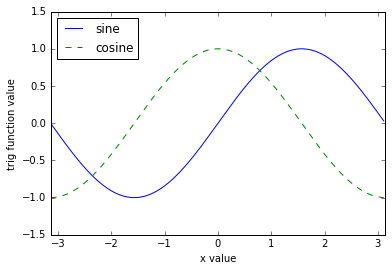

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(- np.pi, np.pi, np.pi /100)

# numpy の array なので np.sin(x) とするだけで一気に値を叩き込める
plt.plot(x, np.sin(x), 'b-', label='sine')
plt.plot(x, np.cos(x), 'g--', label='cosine')

plt.xlabel('x value')
plt.ylabel('trig function value')
plt.xlim(- np.pi, np.pi)
plt.ylim(-1.5, 1.5)
plt.legend(loc='upper left')

# 次の文でグラフを画像として保存できる: 形式は ps, jpg, png, pdf
# plt.savefig('filename')

plt.show()

## 極座標

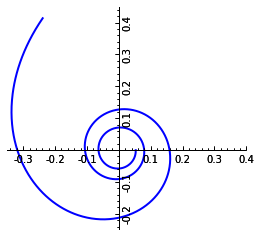

In [1]:
%matplotlib inline

from mpl_toolkits.axes_grid.axislines import SubplotZero
from matplotlib.ticker import MultipleLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

plt.ion()

fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for dir in ax.axis:
    ax.axis[dir].set_visible(dir.endswith("zero"))

ax.set_xlim(-.35,.4)
ax.set_ylim(-.25,.45)
ax.set_aspect('equal')

tick_format = lambda x, i: '' if x == 0.0 else '%.1f' % x
for a in [ax.xaxis, ax.yaxis]:
    a.set_minor_locator(MultipleLocator(0.02))
    a.set_major_formatter(FuncFormatter(tick_format))

theta = np.arange(2*np.pi/3, 6*np.pi, 0.01)
r = 1 / theta

ax.plot(r*np.cos(theta), r*np.sin(theta), lw=2)

plt.show()
#raw_input()

# 常微分方程式
まずは垂直投げ上げから。
2階の微分方程式を解析力学のハミルトン形式よろしく1階に落とす。
\begin{align}
 \ddot{x} = -g.
\end{align}
$v = \dot{x}$ とすると
\begin{align}
 v &= x, \\
 \dot{v} &= -g.
\end{align}
$y = (x, v)$ とすれば $\dot{y} = (v, -g)$ と書ける。
これを差分形式にすると
\begin{align}
 y_{i+1}
 =
 y_{i} + \dot{y} \Delta t.
\end{align}

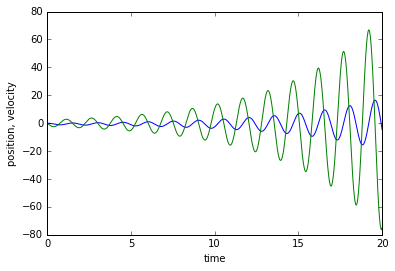

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def free_fall(state , time):
    """時間変数 time は使っていないが今後の一般と合わせるために入れてある"""
    g0 = state[1]
    g1 = -9.8
    return np.array([g0, g1])

def euler(y, t, dt, derivs):
    """オイラー法で計算"""
    y_next = y + derivs(y, t) * dt
    return y_next

"""F = -mg - kx の系を考える"""
N = 1000 # ステップ数
xo = 0.0 # 初期値
vo = 0.0 # 初期値
tau = 20.0 # 全時間を秒で指定
dt = tau / float(N - 1) # 時間のステップ
k = 3.5 # ばね定数
m = 0.2 # 質量
gravity = 9.8 # 重力定数

# 時間の配列を一気に作る
time = np.linspace(0, tau, N)

# 結果を保持する変数
y = np.zeros ([N,2]) #=> [[0, 0], [0,0], ..., [0, 0]]

# 初期条件をセット
y[0, 0] = xo
y[0, 1] = vo

def SHO(state, time):
    g0 = state[1]
    g1 = -k/m * state[0] - gravity
    return np.array([g0, g1])

# オイラー法での計算: 微分する関数は SHO()
for j in range(N - 1):
    y[j+1] = euler(y[j], time[j], dt, SHO)

# データセット
xdata = [y[j,0] for j in range(N)]
vdata = [y[j,1] for j in range(N)]

plt.plot(time, xdata)
plt.plot(time, vdata)
plt.xlabel ("time")
plt.ylabel("position, velocity")
plt.show()

## オイラー法の問題
オイラー法では常に解の曲率を過小評価する。
結果として全ての振動運動でオイラー解のエネルギーは時間とともに増大する。

## オイラー-クロマー法

非振動系にも使えるか、すぐにはわからない。

## ルンゲ-クッタ法

In [2]:
# coding: utf-8
def rk2(y, time, dt, derivs):
    k0 = dt * derivs(y, time)
    k1 = dt * derivs(y * k0, time + dt)
    y_next = y + 0.5 * (k0 + k1)
    return y_next

## 摩擦つきの振動子

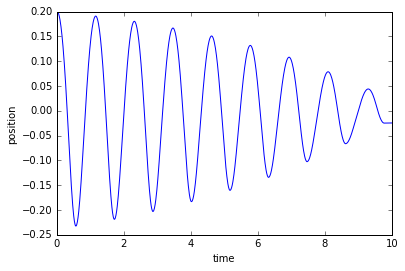

In [40]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

N = 1000
xo = 0.2
vo = 0.0
tau = 10.0
dt = tau / float(N - 1)
k = 30.0
m = 0.25
gravity = 9.8
mu = 0.15

# 時間の配列
time = np.linspace(0, tau, N)

# 初期化
y = np.zeros([N,2])

# 初期状態
y[0 ,0] = xo
y[0, 1] = vo

def SpringMass(state, time):
    g0 = state[1]
    if g0 > 0:
        g1 = - k/m * state[0] - gravity * mu
    else:
        g1 = - k/m * state[0] + gravity * mu

    return np.array([g0, g1])

for j in range(N-1):
    y[j+1] = rk2(y[j], time[j], dt, SpringMass)
#    y[j+1] = rk2(y[j], time[j], dt, SpringMass)
#    y[j+1] = euler(y[j], time[j], dt, SHO)

plt.plot(time, y[:, 0], 'b-', label='position')
plt.xlabel ('time')
plt.ylabel('position')
plt.show()

### ローレンツ方程式
\begin{align}
 \frac{dx}{dt} &= -px + py, \\
 \frac{dy}{dt} &= -xz + rx - y, \\
 \frac{dz}{dt} &= xy - bz.
\end{align}

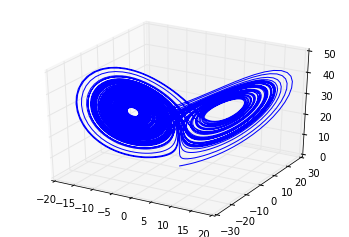

In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def func(v, t, p, r, b):
    return [-p*v[0]+p*v[1], -v[0]*v[2]+r*v[0]-v[1], v[0]*v[1]-b*v[2]]

p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0, 100, 0.01)

# ソルバー
v = odeint(func, v0, t, args=(p, r, b))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(v[:, 0], v[:, 1], v[:, 2])
plt.show()

# Scipy
odeint() という常微分方程式のソルバーがある。

## ばね振り子
運動方程式は次の通り。
ラグランジアンから出すのが楽かもしれない。
\begin{align}
 \ddot{L}
 &=
 (L_{o} + L) \dot{\theta}^2 - \frac{k}{m} L + \cos \theta, \\
 \ddot{\theta}
 &=
 - \frac{1}{L_{o} + L} (g \sin \theta + 2 \dot{L} \dot{\theta}).
\end{align}

/Users/phasetr/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


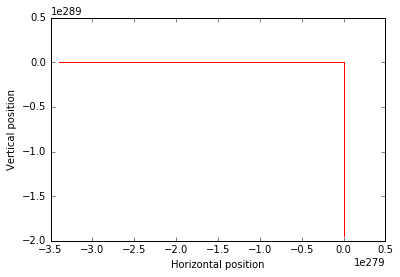

In [1]:
# エラーあり: どうすればいいだろう？
%matplotlib inline
# coding: utf-8
from pylab import *
from scipy.integrate import odeint

# ステップ数
N = 1000

# 計算結果の初期化
y = zeros([4])

L0 = 1.0     # 伸びていないばねの長さ
L = 1.0       # ばねの初期長さ
v0 = 0.0     # 初期測度
theta0 = 0.3 # 初期角度をラジアンで
omega0 = 0.0 # 初期角速度

# 初期状態をセット
y[0] = L
y[1] = v0
y[2] = theta0
y[3] = omega0

# 時間をセット
time = linspace(0, 25, N)

k = 3.5       # ばね定数
m = 0.2       # 質量
gravity = 9.8 # 重力

def spring_pendulum(y, time):
    g0 = y[1]
    # L の微分方程式
    g1 = (L0 + y[0]) * y[3] * y[3] - (k / m) * y[0] + gravity * cos(y[2])
    g2 = y[3]
    # theta の微分方程式
    g3 = (gravity * sin(y[2]) + 2.0 * y[1] * y[3]) / (L0 + y[0])
    return array([g0, g1, g2, g3])

# 計算結果
answer = odeint(spring_pendulum, y, time, full_output = 1)
xdata =   (L0 + answer[0][:, 0]) * sin(answer[0][:, 2])
ydata = - (L0 + answer[0][:, 0]) * cos(answer[0][:, 2])
#print(ydata)
#print(answer[2])
#print(type(answer))
#print(answer)

# グラフを描く
plot(xdata, ydata, 'r-')
xlabel("Horizontal position")
ylabel("Vertical position")
show()


## odeint のサンプル

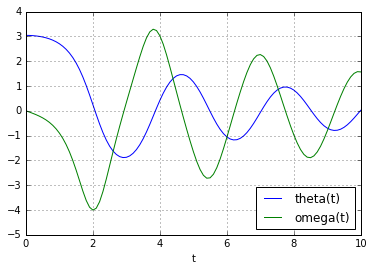

In [1]:
"""
参考 http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
解きたい方程式: theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
正規形に変換:
theta'(t) = omega(t)
omega'(t) = -b*omega(t) - c*sin(theta(t))
"""

%matplotlib inline

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0
# 初期値
y0 = [np.pi - 0.1, 0.0]
# 時間設定
t = np.linspace(0, 10, 101)
# ソルバー
sol = odeint(pend, y0, t, args=(b, c))

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
# loc は location: 最適な位置を設定してくれる
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

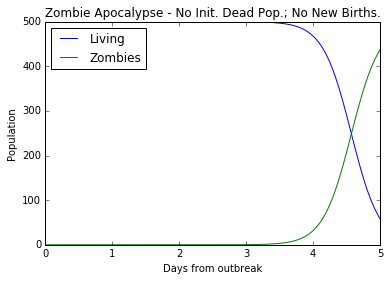

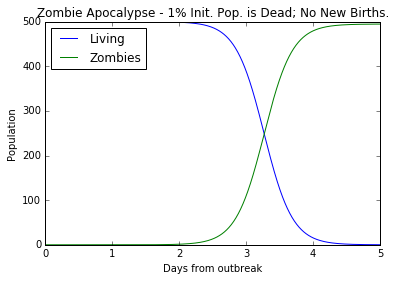

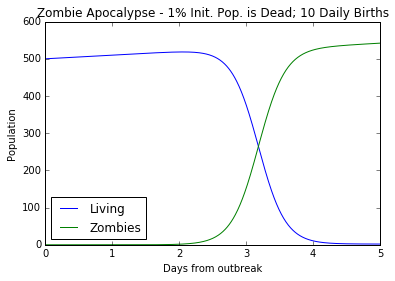

In [3]:
# http://scipy.github.io/old-wiki/pages/Cookbook/Zombie_Apocalypse_ODEINT#CA-9ec8aa31707fce65386b95c319541ababd1e1a2d_27
# zombie apocalypse modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.ion()

P = 0       # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the system dy/dt = f(y, t)
def f(y, t):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    # the model equations (see Munz et al. 2009)
    f0 = P - B*Si*Zi - d*Si
    f1 = B*Si*Zi + G*Ri - A*Si*Zi
    f2 = d*Si + A*Si*Zi - G*Ri
    return [f0, f1, f2]

# initial conditions
S0 = 500.               # initial population
Z0 = 0                  # initial zombie population
R0 = 0                  # initial death population
y0 = [S0, Z0, R0]       # initial condition vector
t  = np.linspace(0, 5., 1000)   # time grid

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)
plt.show()

# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)
plt.show()

# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
P  = 10        # 10 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0)
plt.show()

### 常微分方程式
一階の微分方程式
\begin{align}
 \frac{dx(t)}{dt} = -a x
\end{align}
を解く．一般解は初期条件を $x(0)=x_0$ として
\begin{align}
 x(t) = x_0 e^{-at}.
\end{align}

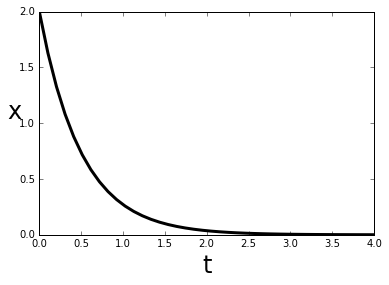

In [7]:
# http://japanichaos.appspot.com/ODEwithScipy.html
%matplotlib inline
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def diff_op(x, time, a):
    return -a*x

# 初期条件
x0 = 2.0
# 係数
a = 2.0

# 時間設定
time = np.linspace(0,4,40)

# 解く
traject = odeint(diff_op, x0 ,time, args=(a,))

plt.plot(time, traject, '-k', linewidth=3)
plt.xlabel('t', fontsize=24)
plt.ylabel('x', fontsize=24,rotation='horizontal')
plt.show()

### 強制振動
参考: <http://japanichaos.appspot.com/ODE2.html>

物理の問題として次の 2 階の常微分方程式
\begin{align}
 \frac{d^2 x}{dt^2} + \gamma \frac{dx}{dt} + \omega^2 x
 =
 \varepsilon f (t)
\end{align}
はよく出てくる.
odeint で解くときは正規形の 1 階の微分方程式に変形する.
\begin{align}
 \begin{split}
   \dot{x}
   &=
   p \\
   \dot{p}
   &= -\gamma \dot{x} - \omega^2 x + \epsilon f (t).
  \end{split}
\end{align}
今回外力として強制振動 $f (t) = \cos (\omega_2 t)$ を考える.

うまくいかなかったのでコードは省略.

## Poincare plot